## Création de votre premier réseau de neurones

Ce notebook permet de créer un premier réseau de neurone qui va classifier des données regroupées de différentes façon en s'inspirant de https://playground.tensorflow.org  
Entrainez-vous sur cette page dans un premier temps puis attaquez le code.


Le code ci-dessous est le code Python permettant de créer votre réseau avec 2 populations séparées (Gaussian)

In [6]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys
import random as rd

def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

## Création des données d'entrainement

In [7]:
datas = []
labels = []
nbr_points = 10000

# on cree des donnes pour tester
# les rouges
abs1 = np.random.normal(-2,.75,nbr_points) # cemtre -2, 0.75 ecart type
ord1 = np.random.normal(-2,.75,nbr_points)
labels1 = np.zeros(nbr_points)   # on attendra [1,0] en sortie pour ces données

# les verts
abs2 = np.random.normal(2,.75,nbr_points)
ord2 = np.random.normal(2,.75,nbr_points)
labels2 = np.zeros(nbr_points) + 1  # on attendra [0,1] en sortie pour ces données

abss = list([abs1,abs2]) # une liste de 2 listes
abss = np.array(abss).ravel() # ravel fait une seule et meme liste (d'abscisses)

ords = list([ord1,ord2])
ords = np.array(ords).ravel() # pareil pour ordonnees

labels = list([labels1,labels2])
labels = np.array(labels).ravel()


In [8]:
c = ['red','green']
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.show()

In [9]:
# ici on cree une liste ou chaque ligne aurait l'absicce et l'ordonnee dun point

datas = np.array([[abss[i],ords[i]] for i in range(2*nbr_points)])
len(datas)
datas_df = np.array([list(data)+[color] for (data,color) in zip(datas, colors)])

In [10]:
list(datas[0])+[labels[0]]

[-1.9675138905375076, -1.649032009880172, 0.0]

In [11]:
df = pd.DataFrame(datas_df, columns=['abs','ord','couleur'])
df

abs                   ord couleur
0      -1.9675138905375076    -1.649032009880172     red
1      -1.6374973403558313   -1.6433802213331146     red
2      -1.7418676733302514    -2.331282810428869     red
3      -2.4765880280563444   -2.9077649632609948     red
4       -0.830613353359756    -1.981997960493882     red
5      -2.5693181068057673   -2.1987233889896274     red
6       -2.856229525088334    -1.383804798337314     red
7       -2.569556854299026    -2.218841154099796     red
8      -1.9674017801251933   -1.5505630274300337     red
9      -2.3780923129737213   -2.2951083168690065     red
10     -3.8139533084697304   -2.0765009016727713     red
11      -1.200046430277771   -1.5763457537706278     red
12     -2.5095073124573855    -2.219661882413122     red
13      -2.346766632375195   -2.3394027008695026     red
14      -2.600546396281999   -3.3578147864885244     red
15      -1.459028647339991    -2.451037392742801     red
16       -2.17318090171949   -1.2125110026178332     red
17      -2.228635193180064   -1.9200274932721122     red
18     -2.4582351019519866   -1.2556878486898444     red
19      -2.623759671855004   -1.3606171622353909     red
20     -2.6310011243569607   -3.2935421527233624     red
21      -2.377045104258291    -1.881455629930441     red
22      -3.149264258786341    -0.747175289664348     red
23      -1.861540761138626   -2.2155827327585405     red
24      -2.337014592650857   -1.2840325314984447     red
25     -2.7356921277617854  -0.19675181960709143     red
26     -2.6060957300523113   -1.8855924086820952     red
27       -2.27020201509518   -0.8390607562929233     red
28     -0.6635633233724221    -2.754428564356146     red
29     -1.1741702341647058    -2.270659881726049     red
...                    ...                   ...     ...
19970   3.4441207975123245    1.4899398848471748   green
19971    1.658998181799394     1.812221003477579   green
19972   2.4772312519614172    0.9024345892974717   green
19973   2.4962944808614957    1.7294936078359109   green
19974   1.7747789049304805    1.5094110047174825   green
19975    2.679907105618342     2.506094230789306   green
19976   2.8929611925611494     2.721754634815157   green
19977   1.9021385638496642     2.011776716343877   green
19978    2.810624332802141     3.662283328677406   green
19979     2.86049059544024     2.796874762675166   green
19980   1.8759188074592212     2.431461111709467   green
19981   1.4683730379866937    1.4345161498038348   green
19982   1.4897210669751573     1.250769336425997   green
19983   2.1380203807744045     3.249281998641105   green
19984   1.3848208699369888    2.1100889947554444   green
19985    2.791971254177002    3.2342987949997664   green
19986    1.687689960012416    2.6226712919642012   green
19987    1.507523657905385    1.1393118535105542   green
19988    2.500688838299075     4.361542148000996   green
19989   1.7968041875999612     2.744976552504919   green
19990  0.38744540621724743     3.091308415987511   green
19991   2.1173513047389037      2.00457912823315   green
19992   1.6384776840881996    0.9211145170354573   green
19993   1.9600269591725163     2.370114300402973   green
19994  0.48419661272546666     1.531398545531827   green
19995   1.3048695378869037    2.1259568331033916   green
19996   3.4356416295861756     1.668549859653719   green
19997   2.5790876408638157    1.8855464188184483   green
19998   2.3735972463847554    2.4534749690460593   green
19999    2.406826718580073     1.555190905880099   green

[20000 rows x 3 columns]

## Création du modèle

In [12]:
# model creation
model = tf.keras.models.Sequential()

### Ajout d'une couche de 2 neurones

In [13]:
# Add the layers
model.add(tf.keras.layers.Dense(2, activation="softmax"))  # softmax va automtiquement faire le lien entre l'indice du max et le labels

## Exemple de prédiction sans entraînement

In [14]:
# output example
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", index_max(list(model_output[0])))
print("Should be : ", labels[0:1][0])

Instructions for updating:
Colocations handled automatically by placer.
[[0.12062246 0.8793775 ]]
Found :  1
Should be :  0.0


## Résumé du modèle (couche de neurones)

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [16]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

In [17]:
labels

array([0., 0., 0., ..., 1., 1., 1.])

## Entraînement
On prend par exemple 20% de données de validation, et on entraine le modèle sur 10 epochs

In [18]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 2s 94us/sample - loss: 0.1239 - acc: 0.9610 - val_loss: 0.0273 - val_acc: 0.9998
Epoch 2/10
16000/16000 [==============================] - 1s 90us/sample - loss: 0.0170 - acc: 0.9999 - val_loss: 0.0155 - val_acc: 0.9998
Epoch 3/10
16000/16000 [==============================] - 1s 87us/sample - loss: 0.0110 - acc: 0.9998 - val_loss: 0.0113 - val_acc: 0.9998
Epoch 4/10
16000/16000 [==============================] - 1s 83us/sample - loss: 0.0084 - acc: 0.9999 - val_loss: 0.0091 - val_acc: 0.9998
Epoch 5/10
16000/16000 [==============================] - 1s 90us/sample - loss: 0.0068 - acc: 0.9999 - val_loss: 0.0077 - val_acc: 0.9998
Epoch 6/10
16000/16000 [==============================] - 1s 85us/sample - loss: 0.0059 - acc: 0.9999 - val_loss: 0.0067 - val_acc: 0.9998
Epoch 7/10
16000/16000 [==============================] - 1s 88us/sample - loss: 0.0052 - acc: 0.9999 - val_loss: 0.0

## Résumé de l'entraînement :
* comparaison des données d'entraînement et de validation

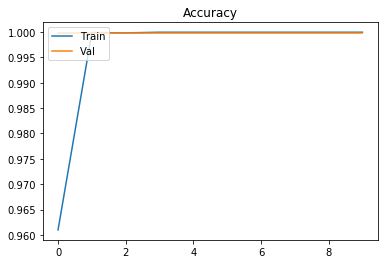

In [19]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

## On réalise nos premières prédictions sur des exemples évidents

In [20]:
datas_tests = np.array([[2,2],[-2,-2]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c[index_max(list(el))])
    
res
    

[[6.1952212e-04 9.9938047e-01]
 [9.9959475e-01 4.0524124e-04]]


['green', 'red']

## Sur des exemples moins évidents 
## le modèle donne un résultat mais peu fiable 
## ce qui est normal puisque l'on se trouve aux limites du modèle

In [21]:
c2 = ['darkred','chartreuse']

datas_tests = np.array([[0,0],[2,-2],[4,-4]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c2[index_max(list(el))])
    
res

[[0.55288637 0.44711354]
 [0.7886777  0.21132234]
 [0.9184601  0.08153989]]


['darkred', 'darkred', 'darkred']

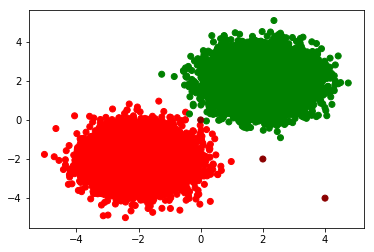

In [22]:
abstest = [ data[0] for data in datas_tests]
ordstest = [ data[1] for data in datas_tests]
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.scatter(abstest,ordstest, color = res)
plt.show()

### Exercice:

Créer un jeu de 2000 données de test comprenant datas et labels, pour tester le modèle précédent

In [23]:
# example
datas_test = np.array([[2,2],[-2,-2]])
labels_test = [1,0]

loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

2/2 [==============================] - 0s 448us/sample - loss: 5.1252e-04 - acc: 1.0000
Test Loss 0.0005125224706716835
Test Accuracy 1.0


[[6.1952212e-04 9.9938047e-01]
 [9.9959475e-01 4.0524124e-04]]


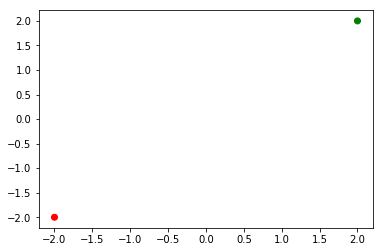

In [24]:

model_output = model.predict(datas_test)
print(model_output)
Colors = [c[index_max(list(model))] for model in model_output]

abstest = [ data[0] for data in datas_test]
ordstest = [ data[1] for data in datas_test]

plt.scatter(abstest,ordstest,color=Colors)

plt.show()


## -----------------------------------------------------------------------
## Création d'un second réseau de neurones

Le code ci-dessous est le code Python permettant de créer un réseau de neurones avec 2 populations séparées différemment (Exclusive Or)

### Essayons avec des données un peu moins bien réparties

## Création des données d'entraînement

In [25]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    if x*y >= 0:
        labels.append(0)
    else:
        labels.append(1)
        
datas = np.array(datas)

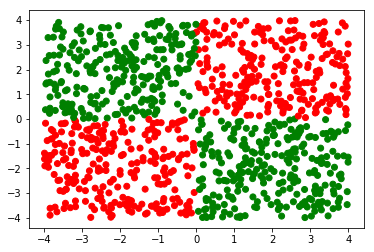

In [26]:
c = ['red','green']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

## Création du modèle

In [27]:
# model creation
model = tf.keras.models.Sequential()

### Ajout des couches de neurones
Il va falloir ajouter une couche de neurones pour complexifier notre modèle, sinon on n'arrivera jamais à obtenir un résultat satisfaisant.

In [28]:
# Add the layers
model.add(tf.keras.layers.Dense(4, activation="relu"))  # si vous avez tester, 4 suffisent pour obtenir un bon résultat
model.add(tf.keras.layers.Dense(2, activation="softmax"))  

## Exemple de prédiction sans entraînement

In [29]:
# output example
print(datas[0:1])
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", c[index_max(list(model_output[0]))])
print("Should be : ", c[labels[0:1][0]])

[[ 2.45765213 -0.0428137 ]]
[[0.58218825 0.4178118 ]]
Found :  red
Should be :  green


## Résumé du modèle (couches de neurones)

In [ ]:
model.summary()

## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [ ]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

## Entraînement

In [ ]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

## Le modèle est-il bien entraîné ?

In [ ]:
datas_test = []
labels_test = []


nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    y = 8 * rd.random() - 4
    datas_test.append([x,y])
    if x*y >= 0:
        labels_test.append(0)
    else:
        labels_test.append(1)
        
datas_test = np.array(datas_test)

In [ ]:
loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

### Exercice: 
Le résultat n'est pas très satisfaisant. Proposez deux façons d'améliorer la prédiction.

## Troisième réseau de neurones

### sur un exemple encore plus tordu... avec 3 populations

## A vous de jouer

In [ ]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    norm_carre = x**2 + y**2
    if norm_carre <= 4:
        labels.append(0)
    elif norm_carre <= 8:
        labels.append(1)
    else:
        labels.append(2)
        
datas = np.array(datas)

In [ ]:
c = ['red','green','yellow']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

### Construire un réseau de neurones correspondant